In [2]:
# Import modules
import json
import pandas as pd

In [3]:
# Load data
train_js = json.load(open("../data/train.json", "r"))

## View data fields

In [3]:
# Check fields
train_js[0].keys()

dict_keys(['pre_text', 'post_text', 'filename', 'table_ori', 'table', 'qa', 'id', 'annotation'])

In [4]:
# Check all possible fields
set([i for js in train_js for i in list(js.keys())])

{'annotation',
 'filename',
 'id',
 'post_text',
 'pre_text',
 'qa',
 'qa_0',
 'qa_1',
 'table',
 'table_ori'}

## Question Samples

In [30]:
# Check a question
train_js[0]["qa"]

{'question': 'what was the percentage change in the net cash from operating activities from 2008 to 2009',
 'answer': '14.1%',
 'explanation': '',
 'ann_table_rows': [6],
 'ann_text_rows': [],
 'steps': [{'op': 'minus2-1',
   'arg1': '206588',
   'arg2': '181001',
   'res': '25587'},
  {'op': 'divide2-2', 'arg1': '#0', 'arg2': '181001', 'res': '14.1%'}],
 'program': 'subtract(206588, 181001), divide(#0, 181001)',
 'gold_inds': {'table_6': '2008 the net cash from operating activities of year ended june 30 2009 2008 is $ 206588 ; the net cash from operating activities of year ended june 30 2009 2008 is $ 181001 ; the net cash from operating activities of year ended june 30 2009 is $ 174247 ;'},
 'exe_ans': 0.14136,
 'program_re': 'divide(subtract(206588, 181001), 181001)'}

In [6]:
# Check a question
train_js[4]["qa_0"]

{'question': 'what is the roi of an investment in ups in 2004 and sold in 2006?',
 'answer': '-8.9%',
 'explanation': '',
 'ann_table_rows': [1],
 'ann_text_rows': [],
 'steps': [{'op': 'minus1-1',
   'arg1': '91.06',
   'arg2': 'const_100',
   'res': '-8.94'},
  {'op': 'divide1-2', 'arg1': '#0', 'arg2': 'const_100', 'res': '-8.9%'}],
 'program': 'subtract(91.06, const_100), divide(#0, const_100)',
 'gold_inds': {'table_1': 'the united parcel service inc . of 12/31/04 is $ 100.00 ; the united parcel service inc . of 12/31/05 is $ 89.49 ; the united parcel service inc . of 12/31/06 is $ 91.06 ; the united parcel service inc . of 12/31/07 is $ 87.88 ; the united parcel service inc . of 12/31/08 is $ 70.48 ; the united parcel service inc . of 12/31/09 is $ 75.95 ;'},
 'exe_ans': -0.0894,
 'program_re': 'divide(subtract(91.06, const_100), const_100)'}

In [7]:
# Check a question
train_js[4]["qa_1"]

{'question': 'what was the difference in percentage cumulative return on investment for united parcel service inc . compared to the s&p 500 index for the five year period ended 12/31/09?',
 'answer': '-26.16%',
 'explanation': '',
 'ann_table_rows': [1, 2],
 'ann_text_rows': [],
 'steps': [{'op': 'minus2-1',
   'arg1': '75.95',
   'arg2': 'const_100',
   'res': '-24.05'},
  {'op': 'divide2-2', 'arg1': '#0', 'arg2': 'const_100', 'res': '-24.05%'},
  {'op': 'minus2-3', 'arg1': '102.11', 'arg2': 'const_100', 'res': '2.11'},
  {'op': 'divide2-4', 'arg1': '#2', 'arg2': 'const_100', 'res': '2.11%'},
  {'op': 'minus2-5', 'arg1': '#1', 'arg2': '#3', 'res': '-26.16%'}],
 'program': 'subtract(75.95, const_100), divide(#0, const_100), subtract(102.11, const_100), divide(#2, const_100), subtract(#1, #3)',
 'gold_inds': {'table_1': 'the united parcel service inc . of 12/31/04 is $ 100.00 ; the united parcel service inc . of 12/31/05 is $ 89.49 ; the united parcel service inc . of 12/31/06 is $ 91.0

In [8]:
# Holistic view
pd.DataFrame(train_js[0]["annotation"])

,amt_table,amt_pre_text,amt_post_text,original_program,step_list,answer_list,dialogue_break,turn_program_ori,dialogue_break_ori,turn_program,qa_split,exe_ans_list
0,<table class='wikitable'><tr><td>1</td><td>200...,"26 | 2009 annual report in fiscal 2008 , reven...","year ended june 30 , cash provided by operatio...","subtract(206588, 181001), divide(A0, 181001)",Ask for number 206588,206588,what is the net cash from operating activities...,206588,what is the net cash from operating activities...,206588,0,206588.00000
1,<table class='wikitable'><tr><td>1</td><td>200...,"26 | 2009 annual report in fiscal 2008 , reven...","year ended june 30 , cash provided by operatio...","subtract(206588, 181001), divide(A0, 181001)",Ask for number 181001,181001,what about in 2008?,181001,what about in 2008?,181001,0,181001.00000
2,<table class='wikitable'><tr><td>1</td><td>200...,"26 | 2009 annual report in fiscal 2008 , reven...","year ended june 30 , cash provided by operatio...","subtract(206588, 181001), divide(A0, 181001)","subtract(206588, 181001)",A0,what is the difference?,"subtract(206588, 181001)",what is the difference?,"subtract(206588, 181001)",0,25587.00000
3,<table class='wikitable'><tr><td>1</td><td>200...,"26 | 2009 annual report in fiscal 2008 , reven...","year ended june 30 , cash provided by operatio...","subtract(206588, 181001), divide(A0, 181001)","divide(A0, 181001)",A1,what percentage change does this represent?,"subtract(206588, 181001), divide(#0, 181001)",what percentage change does this represent?,"subtract(206588, 181001), divide(#0, 181001)",0,0.14136


## Check annotation fields

In [9]:
# Annotation samples
train_js[0]["annotation"]

{'amt_table': "<table class='wikitable'><tr><td>1</td><td>2008</td><td>year ended june 30 2009 2008</td><td>year ended june 30 2009 2008</td><td>year ended june 30 2009</td></tr><tr><td>2</td><td>net income</td><td>$ 103102</td><td>$ 104222</td><td>$ 104681</td></tr><tr><td>3</td><td>non-cash expenses</td><td>74397</td><td>70420</td><td>56348</td></tr><tr><td>4</td><td>change in receivables</td><td>21214</td><td>-2913 ( 2913 )</td><td>-28853 ( 28853 )</td></tr><tr><td>5</td><td>change in deferred revenue</td><td>21943</td><td>5100</td><td>24576</td></tr><tr><td>6</td><td>change in other assets and liabilities</td><td>-14068 ( 14068 )</td><td>4172</td><td>17495</td></tr><tr><td>7</td><td>net cash from operating activities</td><td>$ 206588</td><td>$ 181001</td><td>$ 174247</td></tr></table>",
 'amt_pre_text': '26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 . all revenue components within 

In [10]:
# Annotation samples
train_js[4]["annotation"]

{'amt_table': "<table class='wikitable'><tr><td>1</td><td></td><td>12/31/04</td><td>12/31/05</td><td>12/31/06</td><td>12/31/07</td><td>12/31/08</td><td>12/31/09</td></tr><tr><td>2</td><td>united parcel service inc .</td><td>$ 100.00</td><td>$ 89.49</td><td>$ 91.06</td><td>$ 87.88</td><td>$ 70.48</td><td>$ 75.95</td></tr><tr><td>3</td><td>s&p 500 index</td><td>$ 100.00</td><td>$ 104.91</td><td>$ 121.48</td><td>$ 128.15</td><td>$ 80.74</td><td>$ 102.11</td></tr><tr><td>4</td><td>dow jones transportation average</td><td>$ 100.00</td><td>$ 111.65</td><td>$ 122.61</td><td>$ 124.35</td><td>$ 97.72</td><td>$ 115.88</td></tr></table>",
 'amt_pre_text': '( 1 ) includes shares repurchased through our publicly announced share repurchase program and shares tendered to pay the exercise price and tax withholding on employee stock options . shareowner return performance graph the following performance graph and related information shall not be deemed 201csoliciting material 201d or to be 201cfiled 20

In [11]:
# Check all possible fields
set([i for js in train_js for i in list(js["annotation"].keys())])

{'amt_post_text',
 'amt_pre_text',
 'amt_table',
 'answer_list',
 'answer_list_0',
 'answer_list_1',
 'dialogue_break',
 'dialogue_break_ori',
 'exe_ans_list',
 'offset',
 'original_program',
 'original_program_0',
 'original_program_1',
 'qa_split',
 'step_list',
 'step_list_0',
 'step_list_1',
 'turn_program',
 'turn_program_ori'}

## Reconstruct table

In [21]:
df = pd.read_html(train_js[4]["annotation"]["amt_table"])[0]
df.columns = df.iloc[0]  
df = df[1:].reset_index(drop=True) 
df

/var/folders/6b/lbjm_qyx51n9qc12vknzp4f00000gn/T/ipykernel_50793/1070470792.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(train_js[4]["annotation"]["amt_table"])[0]


,1,NaN,12/31/04,12/31/05,12/31/06,12/31/07,12/31/08,12/31/09
0,2,united parcel service inc .,$ 100.00,$ 89.49,$ 91.06,$ 87.88,$ 70.48,$ 75.95
1,3,s&p 500 index,$ 100.00,$ 104.91,$ 121.48,$ 128.15,$ 80.74,$ 102.11
2,4,dow jones transportation average,$ 100.00,$ 111.65,$ 122.61,$ 124.35,$ 97.72,$ 115.88


In [22]:
df = pd.read_html(train_js[5]["annotation"]["amt_table"])[0]
df.columns = df.iloc[0]  
df = df[1:].reset_index(drop=True) 
display(df)
print(train_js[5]["qa"])

/var/folders/6b/lbjm_qyx51n9qc12vknzp4f00000gn/T/ipykernel_50793/3252388949.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(train_js[5]["annotation"]["amt_table"])[0]


,1,NaN,shares available for awards,shares subject to outstanding awards
0,2,2009 global incentive plan,2322450,2530454
1,3,2004 stock incentive plan,-,5923147


{'question': 'what portion of the total shares subject to outstanding awards is under the 2009 global incentive plan?', 'answer': '70.1%', 'explanation': '', 'ann_table_rows': [1, 2], 'ann_text_rows': [], 'steps': [{'op': 'add2-1', 'arg1': '2530454', 'arg2': '5923147', 'res': '8453601'}, {'op': 'divide2-2', 'arg1': '5923147', 'arg2': '#0', 'res': '70.1%'}], 'program': 'add(2530454, 5923147), divide(5923147, #0)', 'gold_inds': {'table_1': 'the 2009 global incentive plan of shares available for awards is 2322450 ; the 2009 global incentive plan of shares subject to outstanding awards is 2530454 ;', 'table_2': 'the 2004 stock incentive plan of shares available for awards is - ; the 2004 stock incentive plan of shares subject to outstanding awards is 5923147 ;'}, 'exe_ans': 0.70067, 'program_re': 'divide(5923147, add(2530454, 5923147))'}


## Difference between pre and post text

Text is already chunked

In [23]:
train_js[5]["pre_text"]

['tax returns for 2001 and beyond are open for examination under statute .',
 'currently , unrecognized tax benefits are not expected to change significantly over the next 12 months .',
 '19 .',
 'stock-based and other management compensation plans in april 2009 , the company approved a global incentive plan which replaces the company 2019s 2004 stock incentive plan .',
 'the 2009 global incentive plan ( 201cgip 201d ) enables the compensation committee of the board of directors to award incentive and nonqualified stock options , stock appreciation rights , shares of series a common stock , restricted stock , restricted stock units ( 201crsus 201d ) and incentive bonuses ( which may be paid in cash or stock or a combination thereof ) , any of which may be performance-based , with vesting and other award provisions that provide effective incentive to company employees ( including officers ) , non-management directors and other service providers .',
 'under the 2009 gip , the company no 

In [24]:
train_js[5]["post_text"]

['upon the termination of a participant 2019s employment with the company by reason of death or disability or by the company without cause ( as defined in the respective award agreements ) , an award in amount equal to ( i ) the value of the award granted multiplied by ( ii ) a fraction , ( x ) the numerator of which is the number of full months between grant date and the date of such termination , and ( y ) the denominator of which is the term of the award , such product to be rounded down to the nearest whole number , and reduced by ( iii ) the value of any award that previously vested , shall immediately vest and become payable to the participant .',
 'upon the termination of a participant 2019s employment with the company for any other reason , any unvested portion of the award shall be forfeited and cancelled without consideration .',
 'there was $ 19 million and $ 0 million of tax benefit realized from stock option exercises and vesting of rsus during the years ended december 31 

## Check length of inputs

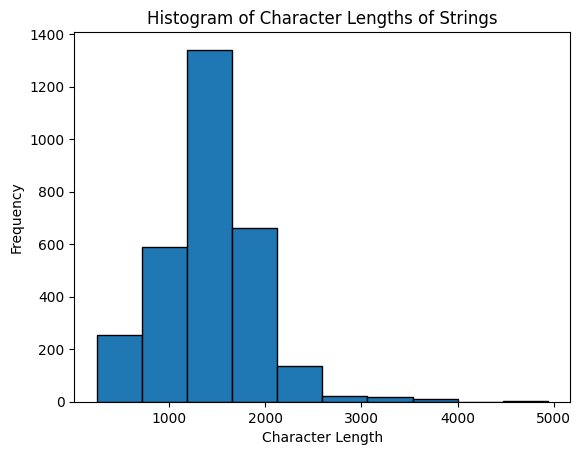

In [9]:
import matplotlib.pyplot as plt

def plot_histogram_of_lengths(strings):
    # Calculate the length of each string
    tokens = [len(s) / 3 for s in strings]

    # Plot the histogram
    plt.hist(tokens, bins=10, edgecolor='black')
    plt.xlabel('Character Length')
    plt.ylabel('Frequency')
    plt.title('Histogram of Character Lengths of Strings')
    plt.show()

# Ensure each part is converted to a string
strings = [" ".join([
    " ".join(s["pre_text"]) if isinstance(s["pre_text"], list) else str(s["pre_text"]),
    str(s["annotation"]["amt_table"]),
    " ".join(s["post_text"]) if isinstance(s["post_text"], list) else str(s["post_text"])
]) for s in train_js]

plot_histogram_of_lengths(strings)